# Imports & Settings

In [20]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from matplotlib.patches import *
import pandas as pd
from IPython.display import display, Math
from Lagrange import LagrangeSym as Lagrange


In [2]:
x = sp.symbols('x')

original = sp.cos(x);
start = 0
end = np.pi/2
xSpace = np.linspace(0, 1.75, 100, dtype=float)


<>:16: SyntaxWarning: invalid escape sequence '\i'
<>:16: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_27885/3373321259.py:16: SyntaxWarning: invalid escape sequence '\i'
  text = "\int^{\pi / 2}_0cos(x)dx = 1"


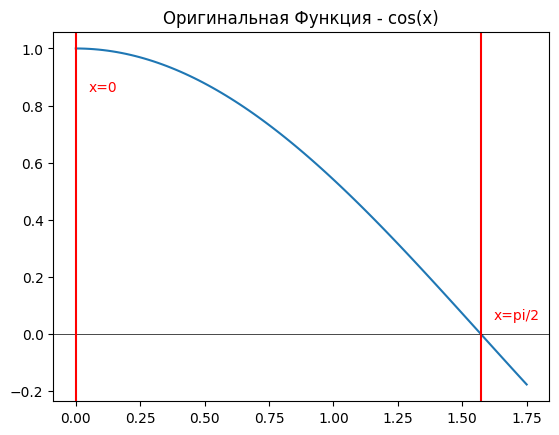

<IPython.core.display.Math object>

In [3]:
y = [original.subs(x, i) for i in xSpace]

plt.title('Оригинальная Функция - cos(x)')

# plt.fill_between(xSpace, y, np.zeros_like(xSpace))
plt.plot(xSpace, y)
plt.axhline(0, color='black', linewidth=0.5)

plt.axvline(start, color='red',)
plt.axvline(end, color='red')

plt.text(.05, .85, 'x=0', color='red')
plt.text(end + .05, .05, 'x=pi/2', color='red')
plt.show()

text = "\int^{\pi / 2}_0cos(x)dx = 1"
display(Math(text))

# Формулы Прямоугольников

Левых прямоугольников:

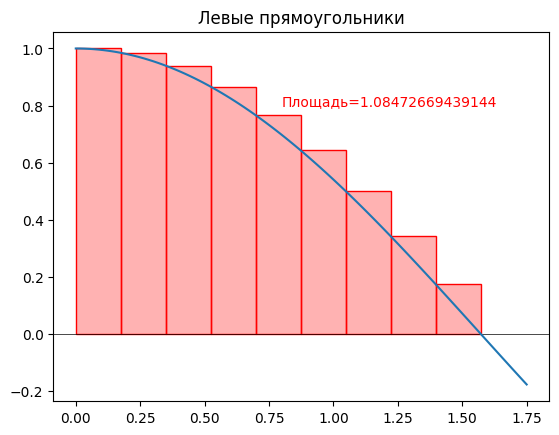

1.08472669439144


In [4]:
fig, ax = plt.subplots()
ax.set_title('Левые прямоугольники')
ax.axhline(0, color='black', linewidth=0.5)
ax.plot(xSpace, [original.subs(x, i) for i in xSpace])
points = 10 # Количество точек в полуинтервале [start, end)

xRange = np.linspace(start, end, points)

y = [original.subs(x, i) for i in xRange]
# print(xRange, y)

ApproxSum = 0
for i in range(points-1):
    h = xRange[i+1] - xRange[i]
    ax.add_patch(Rectangle([xRange[i],0], h, y[i], facecolor=('r', .3), edgecolor='r',))
    ApproxSum += h * y[i]

plt.text(.8, .8, 'Площадь=' + str(ApproxSum), color='r')
plt.show()
print(ApproxSum)

Правые Прямоугольники:

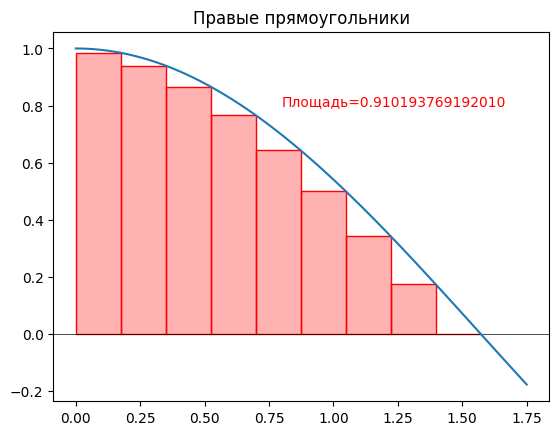

0.910193769192010


In [5]:
fig, ax = plt.subplots()
ax.set_title('Правые прямоугольники')
ax.axhline(0, color='black', linewidth=0.5)
ax.plot(xSpace, [original.subs(x, i) for i in xSpace])
points = 10 # Количество точек в полуинтервале [start, end)

xRange = np.linspace(start, end, points)

y = [original.subs(x, i) for i in xRange]
# print(xRange, y)

ApproxSum = 0
for i in range(1, points):
    h = xRange[i] - xRange[i-1]
    ax.add_patch(Rectangle([xRange[i],0], -h, y[i], facecolor=('r', .3), edgecolor='r',))
    ApproxSum += h * y[i]

plt.text(.8, .8, 'Площадь=' + str(ApproxSum), color='r')
plt.show()
print(ApproxSum)

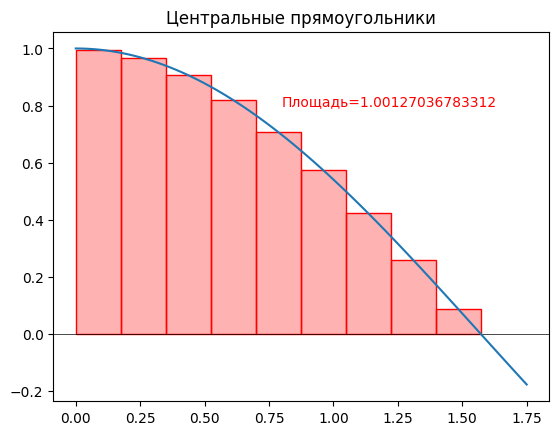

1.00127036783312


In [6]:
fig, ax = plt.subplots()
ax.set_title('Центральные прямоугольники')
ax.axhline(0, color='black', linewidth=0.5)
ax.plot(xSpace, [original.subs(x, i) for i in xSpace])
points = 10 # Количество точек в полуинтервале [start, end)

xRangeLeft = np.linspace(start, end, points)
xRange = (xRangeLeft[:-1] + xRangeLeft[1:]) / 2 
y = [original.subs(x, i) for i in xRange]
# print(xRange, y)

ApproxSum = 0
for i in range(points-1):
    h = xRange[1] - xRange[0]
    ax.add_patch(Rectangle([xRangeLeft[i],0], h, y[i], facecolor=('r', .3), edgecolor='r',))
    ApproxSum += h * y[i]

plt.text(.8, .8, 'Площадь=' + str(ApproxSum), color='r')
plt.show()
print(ApproxSum)

# Формулы Трапеций и Симпсона

Формула Трапеций

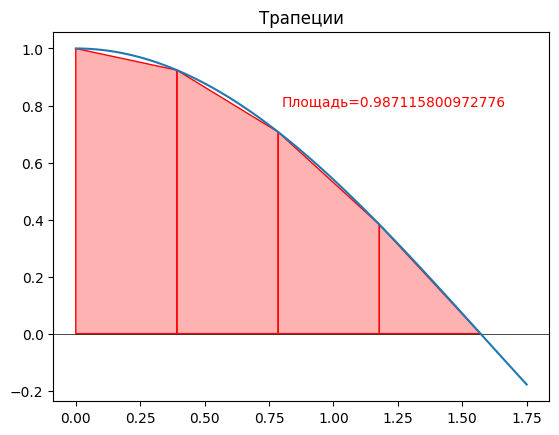

0.987115800972776


In [33]:
fig, ax = plt.subplots()
ax.set_title('Трапеции')
ax.axhline(0, color='black', linewidth=0.5)
ax.plot(xSpace, [original.subs(x, i) for i in xSpace])

points = 5

xRange = np.linspace(start, end, points)
y = [original.subs(x, i) for i in xRange]

ApproxSum = 0
for i in range(points-1):
    h = xRange[i+1] - xRange[i]
    ApproxSum += h * (y[i] + y[i+1]) / 2
    ax.fill([xRange[i], xRange[i], xRange[i+1], xRange[i+1]], [0, y[i], y[i+1], 0], color=('r', .3), edgecolor='r')

plt.text(.8, .8, 'Площадь=' + str(ApproxSum), color='r')
plt.show()
print(ApproxSum)

Метод Симпсона:

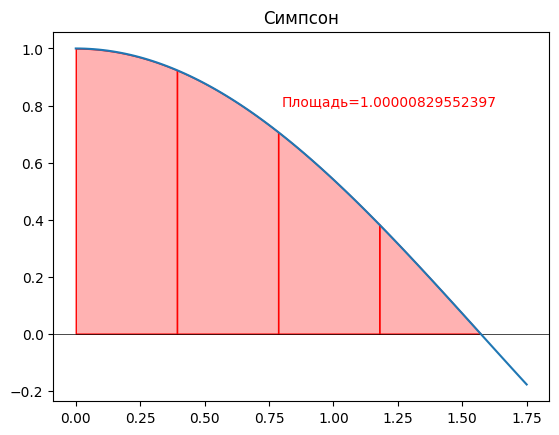

1.00000829552397


In [34]:
fig, ax = plt.subplots()
ax.set_title('Симпсон')
ax.axhline(0, color='black', linewidth=0.5)
ax.plot(xSpace, [original.subs(x, i) for i in xSpace])

parabols = 4

xRange = np.linspace(start, end, 1 + 2*parabols)
y = [original.subs(x, i) for i in xRange]

# print(xRange, y)
ApproxSum = 0

for i in range(0, len(xRange)-2, 2):
    h = xRange[i+2] - xRange[i]
    ApproxSum += h/6 * (y[i] + 4*y[i+1] + y[i+2])
    
    parabola = Lagrange(xRange, y, xRange[1] - xRange[0])
    parSpace = np.linspace(xRange[i], xRange[i+2], 20)
    ax.fill_between(parSpace, [float(parabola.subs(x, i)) for i in parSpace], color=('r', 0.3), edgecolor='r')

plt.text(.8, .8, 'Площадь=' + str(ApproxSum), color='r')
plt.show()
print(ApproxSum)